In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
gnb = GaussianNB()

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [4]:
X,Y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0)

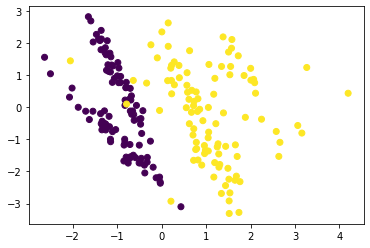

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
print(X[0])
print(X.shape)

[ 0.78601259 -1.28913304]
(200, 2)


In [7]:
#Train classifier
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
gnb.score(X,Y)

0.94

In [9]:
ypred = gnb.predict(X)

In [10]:
print(ypred)

[1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0
 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1]


In [11]:
acc = np.sum(ypred==Y)/X.shape[0]
print(acc)

0.94


### Generate Confussion Matrix
also shown in gaussian naive bayes for better understanding

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cnf_matrix = confusion_matrix(Y,ypred)
print(cnf_matrix)

[[94  5]
 [ 7 94]]


### Visualise Confusion Matrix 

In [15]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

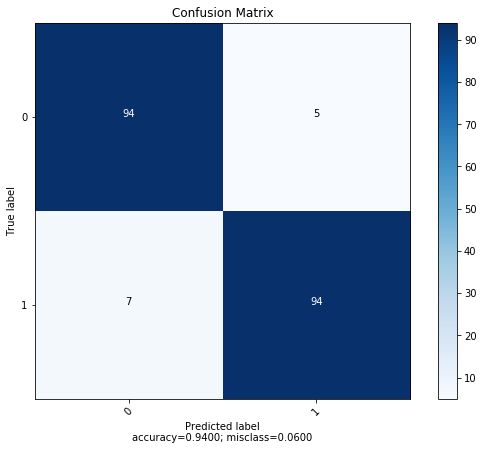

In [16]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix")